# **Introducción a los Algoritmos Genéticos**

**Docente:** PhD Jorge Rudas

**Aprendizaje de Máquina - 2025 I**

**INFOTEP**

In [61]:
from IPython.display import Image
from IPython.core.display import HTML

Image(url= "https://www.ighniz.com/wp-content/uploads/2017/06/Proceso.png")


Un **algoritmo genético** es un método de inteligencia artificial inspirado en los principios de la **evolución biológica**. Su objetivo es encontrar soluciones **óptimas o cercanas a lo óptimo** para problemas complejos. Funciona generando una **población** de soluciones posibles **(individuos)**, evaluando su calidad con una función de aptitud **(fitness)**, y mejorándolas progresivamente mediante operadores evolutivos como la **selección** (elige las mejores soluciones), el **cruce** (combina partes de dos soluciones) y la **mutación** (introduce variaciones aleatorias). Este proceso se repite por varias **generaciones** hasta que se encuentra una solución suficientemente buena.

In [62]:
# Plantilla de un algoritmo genético

import sympy
import random
import math
from sympy.plotting import plot

class AlgoritmoGenetico:
    def __init__(self, tamano_poblacion, probabilidad_mutacion, probabilidad_cruce, numero_generaciones, funcion_aptitud):
        self.tamano_poblacion = tamano_poblacion
        self.probabilidad_mutacion = probabilidad_mutacion
        self.probabilidad_cruce = probabilidad_cruce
        self.numero_generaciones = numero_generaciones
        self.funcion_aptitud = funcion_aptitud
        self.poblacion = []

    def inicializar_poblacion(self, tamano_cromosoma):
        # Se debe definir la forma en que se inicializa cada individuo (cromosoma)
        # de la población.
        # Ejemplo: Población de cadenas binarias
        for _ in range(self.tamano_poblacion):
          individuo = ''.join(random.choice(['0', '1']) for _ in range(tamano_cromosoma))
          self.poblacion.append(individuo)

    def evaluar_poblacion(self):
        # Se calcula la aptitud (fitness) de cada individuo (que tán bien adaptado está según la función de costo)
        aptitudes = []
        for individuo in self.poblacion:
            aptitudes.append(self.funcion_aptitud(individuo))
        return aptitudes

    def seleccionar_padres(self, aptitudes):
        # Selección por ruleta
        # Evitar pesos negativos o cero
        adjusted_aptitudes = [max(0.0001, aptitud) for aptitud in aptitudes]  # Reemplazar valores <= 0 con un valor muy pequeño
        total_aptitud = sum(adjusted_aptitudes)
        if total_aptitud == 0: #Manejar el caso en que todas las aptitudes sean cero.
          adjusted_aptitudes = [1] * len(aptitudes)
          total_aptitud = len(aptitudes)

        probabilidades = [aptitud / total_aptitud for aptitud in adjusted_aptitudes]
        padres = random.choices(self.poblacion, weights=probabilidades, k=2) #Ejemplo básico
        return padres

    def cruzar(self, padre1, padre2):
        # Cruce de un punto de selección aleatorio
        punto_cruce = random.randint(1, len(padre1) - 1)
        hijo1 = padre1[:punto_cruce] + padre2[punto_cruce:]
        hijo2 = padre2[:punto_cruce] + padre1[punto_cruce:]
        return hijo1, hijo2

    def mutar(self, individuo):
        # Método de mutación
        nuevo_individuo = ""
        for bit in individuo:
            if random.random() < self.probabilidad_mutacion:
                nuevo_individuo += '1' if bit == '0' else '0'  # Invertir el bit
            else:
                nuevo_individuo += bit
        return nuevo_individuo

    def ejecutar(self, tamano_cromosoma):
        self.inicializar_poblacion(tamano_cromosoma)
        for _ in range(self.numero_generaciones):
            aptitudes = self.evaluar_poblacion()
            nueva_poblacion = []

            for _ in range(self.tamano_poblacion // 2): #Se crean pares de hijos
              padre1, padre2 = self.seleccionar_padres(aptitudes)
              hijo1, hijo2 = self.cruzar(padre1, padre2)
              hijo1 = self.mutar(hijo1)
              hijo2 = self.mutar(hijo2)
              nueva_poblacion.extend([hijo1, hijo2])

            self.poblacion = nueva_poblacion
        return self.poblacion

# **Ejemplo 1** - Encontrar el máximo de una función analítica en 2D

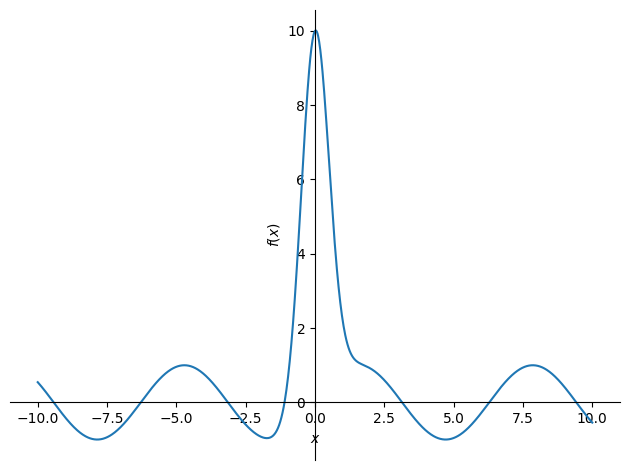

In [63]:
# Primero definimos la plantilla de la función que será la función de costo. En este caso, será una gausiana oscilante
import sympy
import random
import math
from sympy.plotting import plot

# Se define variable simbólica
x = sympy.symbols('x')

# Gaussian con Oscilaciones
a = 10       # Amplitude
b = 0.5     # Desviación estandar
c = 0       # x- del centro
omega = 1   # Frecuencia de oscilación

#f = (x-147.5)**2   #FUNCION 2° PUNTO

f = a * sympy.exp(-((x - c)**2) / (2 * b**2))  + sympy.sin(omega * x)  #FUNCION NORMAL

#p = plot(f, (x, -600, 600))

p = plot(f, (x, -10, 10))

Creamos una función python que usará la función analítica previamente creada (variable *f*)

In [64]:
import random
import math

def gaussiana_oscilante(cromosoma):
    """
    Función de aptitud que simula una distribución gaussiana con oscilaciones.

    Args:
        cromosoma: Una cadena binaria representando un individuo.

    Returns:
        Un valor numérico representando la aptitud del individuo.
    """
    # Convertir el cromosoma binario a un número decimal
    decimal = int(cromosoma, 2)

    # Calcular la aptitud como una gaussiana con oscilaciones
    aptitud = f.subs({x: decimal})
    return aptitud


# Instancia del algoritmo genético con la nueva función de aptitud
ag = AlgoritmoGenetico(tamano_poblacion=10, probabilidad_mutacion=0.1, probabilidad_cruce=0.9, numero_generaciones=100, funcion_aptitud=gaussiana_oscilante)

# Ejecutar el algoritmo genético
poblacion_final = ag.ejecutar(tamano_cromosoma = 5)
poblacion_final


['00100',
 '00000',
 '00000',
 '00100',
 '00000',
 '10000',
 '00000',
 '00000',
 '01000',
 '10000']

Ahora vamos a dibujar la ubicación de los individuos en la ultima generación sobre el espacio de busqueda, con el proposito de evaluar de mejor forma nuestros resultados

In [65]:

def dibujar_poblacion(poblacion_final_numeros, aptitudes_finales_numeros):
  import matplotlib.pyplot as plt
  import numpy as np

  # Crear un rango de valores x para graficar la función
  x_func = np.linspace(min(poblacion_final_numeros) - 10, max(poblacion_final_numeros) + 10, 400)
  y_func = [f.subs({x: val}) for val in x_func]

  # Graficar la función de aptitud
  plt.plot(x_func, y_func, label='Función de Aptitud')

  # Graficar los individuos de la última generación
  plt.scatter(poblacion_final_numeros, aptitudes_finales_numeros, color='red', label='Individuos (Última Generación)')

  # Etiquetas y leyenda
  plt.xlabel('x')
  plt.ylabel('Aptitud')
  plt.title('Individuos de la última generación sobre la función de costo')
  plt.legend()
  plt.grid(True)

  # Mostrar el gráfico
  plt.show()


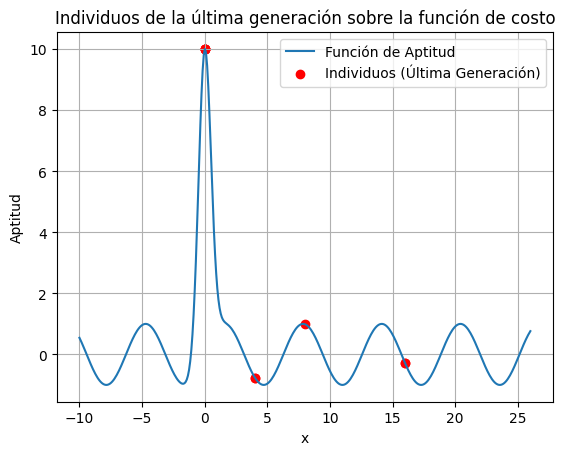

In [66]:
  # Obtener las aptitudes de la última generación
  aptitudes_finales = ag.evaluar_poblacion()

  # Convertir los cromosomas a valores decimales
  poblacion_final_numeros = [int(individuo, 2) for individuo in poblacion_final]
  dibujar_poblacion(poblacion_final_numeros, aptitudes_finales)
#

# **Taller en clase - Individual**
El objetivo de este taller es que los participantes comprendan y apliquen los fundamentos de los algoritmos genéticos mediante la implementación práctica de uno de estos algoritmos para resolver un problema de optimización. A través de esta experiencia, ustedes como estudiantes aprenderán a diseñar una representación adecuada del problema, definir funciones de evaluación (fitness), aplicar operadores evolutivos como la selección, cruce y mutación, y evaluar el rendimiento de su algoritmo sobre instancias concretas. Al finalizar el taller, serán capaces de analizar la efectividad del algoritmo en términos de calidad de las soluciones, velocidad de convergencia y adaptabilidad frente a diferentes configuraciones o restricciones del problema.


**NOTA:** *Debemos hacer la actividad a conciencia, tratando de retarnos a pensar de forma crítica. Esforzandonos a comprender la sintaxis de problemación propuesta, la lógica de subyace a un algoritmo genético y su sus posibles usos.*


## **Actividades**
1. (1 punto) Agregue la lógica de programación necesaria para mostrar la población sobre la función de costo cada 10 generaciones
2. (1.5 puntos) Pruebe la implementación con una función parabolica ascendente con el minimo en la posición 142.7. Use el AG para calcular ese minimo.
3. (2.5 puntos) Establezca una solución al **problema del vendedor viajante** utilizando el anterior algoritmo genético.

## **Pistas**

* Primero defina como va a representar a cada individuo
* Luego defina como va a generar la población inicial (puede ser aleatoriamente)
* Despues defina cual será su función de costo
* Evalue si es necesario hacer cambios en los operadores evolutivos, de ser así, reformule.
* Evalue si es necesario hacer cambios en las funciones de graficación, si es así, reformule.

**Punto 1**

In [67]:
def ejecutar(self, tamano_cromosoma):
    self.inicializar_poblacion(tamano_cromosoma)

    for generacion in range(self.numero_generaciones):
        aptitudes = self.evaluar_poblacion()

        #Generar nueva poblacion mediante cruce y mutacion
        self.poblacion = [
            self.mutar(hijo)
            for _ in range(self.tamano_poblacion // 2)
            for hijo in self.cruzar(*self.seleccionar_padres(aptitudes))
        ]

        #Visualizacion cada 10 generaciones
        if (generacion + 1) % 10 == 0:
            aptitudes_actuales = self.evaluar_poblacion()
            numeros = list(map(lambda x: int(x, 2), self.poblacion))
            dibujar_poblacion(numeros, aptitudes_actuales)

    return self.poblacion


**Punto 2**

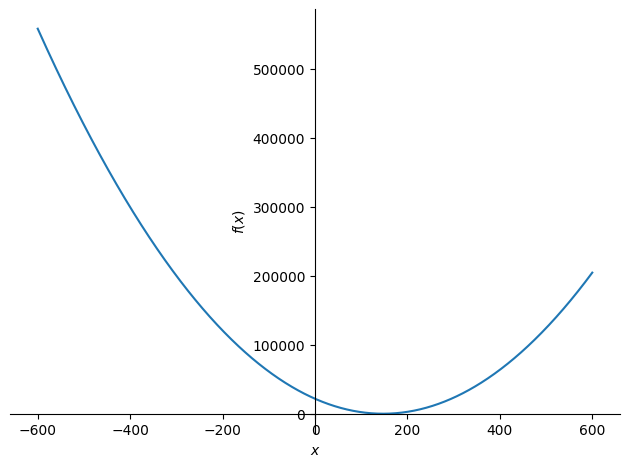

In [68]:
# Primero definimos la plantilla de la función que será la función de costo. En este caso, será una gausiana oscilante
import sympy
import random
import math
from sympy.plotting import plot

# Se define variable simbólica
x = sympy.symbols('x')

# Gaussian con Oscilaciones
a = 10       # Amplitude
b = 0.5     # Desviación estandar
c = 0       # x- del centro
omega = 1   # Frecuencia de oscilación

f = (x-147.5)**2   #FUNCION 2° PUNTO

#f = a * sympy.exp(-((x - c)**2) / (2 * b**2))  + sympy.sin(omega * x)  #FUNCION NORMAL

p = plot(f, (x, -600, 600))

In [69]:

def dibujar_poblacion(poblacion_final_numeros, aptitudes_finales_numeros):
  import matplotlib.pyplot as plt
  import numpy as np

  # Crear un rango de valores x para graficar la función
  x_func = np.linspace(min(poblacion_final_numeros) - 200, max(poblacion_final_numeros) + 200, 400)
  y_func = [f.subs({x: val}) for val in x_func]

  # Graficar la función de aptitud
  plt.plot(x_func, y_func, label='Función de Aptitud')

  # Graficar los individuos de la última generación
  plt.scatter(poblacion_final_numeros, aptitudes_finales_numeros, color='red', label='Individuos (Última Generación)')

  # Etiquetas y leyenda
  plt.xlabel('x')
  plt.ylabel('Aptitud')
  plt.title('Individuos de la última generación sobre la función de costo')
  plt.legend()
  plt.grid(True)

  # Mostrar el gráfico
  plt.show()


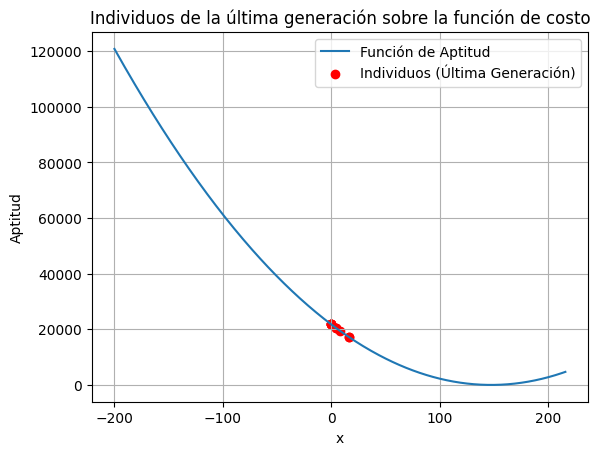

In [70]:
  # Obtener las aptitudes de la última generación
  aptitudes_finales = ag.evaluar_poblacion()

  # Convertir los cromosomas a valores decimales
  poblacion_final_numeros = [int(individuo, 2) for individuo in poblacion_final]
  dibujar_poblacion(poblacion_final_numeros, aptitudes_finales)
#

**Punto 3**

Mejor ruta encontrada (Ciudades): ['D', 'E', 'B', 'A', 'C']
Distancia de la mejor ruta: 79.99999360100053


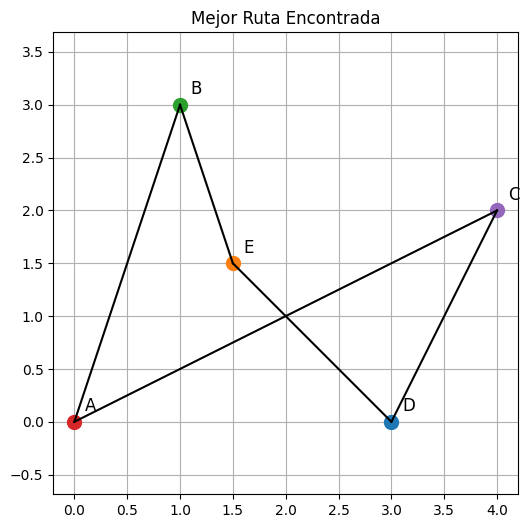

In [74]:
import random
import matplotlib.pyplot as plt

class AlgoritmoGeneticoViajero:
    def __init__(self, tamano_poblacion, prob_mutacion, prob_cruce, generaciones, ciudades, distancias):
        self.tamano_poblacion = tamano_poblacion #Cantidad de individuos en la población
        self.prob_mutacion = prob_mutacion #Probabilidad de mutación
        self.prob_cruce = prob_cruce #Probabilidad de cruce entre individuos
        self.generaciones = generaciones #Número de generaciones a simular
        self.ciudades = ciudades #Lista de ciudades que deben visitarse
        self.distancias = distancias #Matriz de distancias entre ciudades
        self.poblacion = [] #Lista de rutas (o soluciones) en la población

    def inicializar_poblacion(self):
        self.poblacion = [random.sample(self.ciudades, len(self.ciudades)) for _ in range(self.tamano_poblacion)]

    def calcular_distancia(self, ruta):
        return sum(self.distancias[ruta[i]][ruta[(i + 1) % len(ruta)]] for i in range(len(ruta)))

    def calcular_aptitud(self, ruta): #Define la función de aptitud: cuanto menor sea la distancia, mayor será la aptitud
        return 1 / (self.calcular_distancia(ruta) + 1e-9)

    def seleccionar_padres(self, aptitudes):
        total = sum(aptitudes) #Si no hay aptitud, selecciona aleatoriamente
        if total == 0:
            return random.sample(self.poblacion, 2)
        probs = [a / total for a in aptitudes]
        return random.choices(self.poblacion, weights=probs, k=2)

    def cruzar(self, p1, p2): #Realiza el cruce de dos padres para generar dos hijos
        i, j = sorted(random.sample(range(len(self.ciudades)), 2))
        seg1 = p1[i:j]
        hijo1 = seg1 + [c for c in p2 if c not in seg1]
        seg2 = p2[i:j]
        hijo2 = seg2 + [c for c in p1 if c not in seg2]
        return hijo1, hijo2

    def mutar(self, ruta): #Aplica mutación intercambiando dos ciudades de la ruta con una cierta probabilidad
        if random.random() < self.prob_mutacion:
            i, j = random.sample(range(len(ruta)), 2)
            ruta[i], ruta[j] = ruta[j], ruta[i]
        return ruta

    def evolucionar(self): #Ejecuta el proceso evolutivo sobre múltiples generaciones
        self.inicializar_poblacion()
        for _ in range(self.generaciones):
            aptitudes = [self.calcular_aptitud(r) for r in self.poblacion]
            nueva_pob = []
            while len(nueva_pob) < self.tamano_poblacion:
                p1, p2 = self.seleccionar_padres(aptitudes)
                h1, h2 = self.cruzar(p1, p2) if random.random() < self.prob_cruce else (p1[:], p2[:])
                nueva_pob.extend([self.mutar(h1), self.mutar(h2)])
            self.poblacion = nueva_pob[:self.tamano_poblacion]

        aptitudes_finales = [self.calcular_aptitud(r) for r in self.poblacion] # Obtiene la mejor solución encontrada
        mejor = max(zip(self.poblacion, aptitudes_finales), key=lambda x: x[1])
        return mejor[0], 1 / (mejor[1] + 1e-9)

def graficar_ruta(ruta, coordenadas):
    plt.figure(figsize=(6, 6))
    for ciudad in ruta:
        x, y = coordenadas[ciudad]
        plt.plot(x, y, 'o', markersize=10)
        plt.text(x + 0.1, y + 0.1, ciudad, fontsize=12)

    for i in range(len(ruta)): # Une las ciudades para formar la ruta con líneas
        ciudad_actual = ruta[i]
        ciudad_siguiente = ruta[(i + 1) % len(ruta)]
        x1, y1 = coordenadas[ciudad_actual]
        x2, y2 = coordenadas[ciudad_siguiente]
        plt.plot([x1, x2], [y1, y2], 'k-')

    plt.title("Mejor Ruta Encontrada")
    plt.axis('equal')
    plt.grid(True)
    plt.show()

# Matriz de distancia entre las ciudades (Aqui se pueden añadir las ciudades, editando la matriz de forma simetrica y consistente)
ciudades = ['A', 'B', 'C', 'D', 'E']
distancias = {
    'A': {'A': 0, 'B': 10, 'C': 15, 'D': 20, 'E':25},
    'B': {'A': 10, 'B': 0, 'C': 35, 'D': 25, 'E':15},
    'C': {'A': 15, 'B': 35, 'C': 0, 'D': 30, 'E':20},
    'D': {'A': 20, 'B': 25, 'C': 30, 'D': 0, 'E':10},
    'E': {'A': 25, 'B': 15, 'C': 20, 'D': 10, 'E':0}
}
# Coordenadas de ciudades para ubicacion en el grafico
coordenadas = {
    'A': (0, 0),
    'B': (1, 3),
    'C': (4, 2),
    'D': (3, 0),
    'E': (1.5, 1.5)
}

algoritmo = AlgoritmoGeneticoViajero(
    tamano_poblacion=80,
    prob_mutacion=0.05,
    prob_cruce=0.8,
    generaciones=400,
    ciudades=ciudades,
    distancias=distancias
)

mejor_ruta, mejor_distancia = algoritmo.evolucionar()
print("Mejor ruta encontrada (Ciudades):", mejor_ruta)
print("Distancia de la mejor ruta:", mejor_distancia)

graficar_ruta(mejor_ruta, coordenadas)
